# Tweet Stock Sentiment Project 4 (P)

Christian Branton

In [2]:
import json
import pandas as pd
import numpy as np
import re
from datetime import date
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

## Load API data into dataframe
We load the data acquired from the twitter API into a dataframe so we can clean it and manipulate it easier

In [3]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
print(len(tweets_data))

71345


In [4]:
tweets_data_path = 'twitter_data2.txt'

tweets_data2 = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data2.append(tweet)
    except:
        continue
print(len(tweets_data2))

82190


In [5]:
x = tweets_data[20]
x

{'created_at': 'Tue May 14 00:21:53 +0000 2019',
 'id': 1128093036045635584,
 'id_str': '1128093036045635584',
 'text': "RT @meyer_lucas: Ford to tenure prof convo\n\nFORD: So we've got a great idea. \n\nPROF puts down pipe: Go on premier. \n\nFORD: Since you get a…",
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 48886531,
  'id_str': '48886531',
  'name': 'JC',
  'screen_name': 'Swizzcapz',
  'location': 'Mississauga, ON',
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 32,
  'friends_count': 83,
  'listed_count': 1,
  'favourites_count': 3025,
  'statuses_count': 1101,
  'created_at': 'Sat Jun 20 01:12:19 +0000 2009',
  'utc_offset': None,
  'time_zone'

In [6]:
"""tweets_by_lang = tweets_0513['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')"""

"tweets_by_lang = tweets_0513['lang'].value_counts()\n\nfig, ax = plt.subplots()\nax.tick_params(axis='x', labelsize=15)\nax.tick_params(axis='y', labelsize=10)\nax.set_xlabel('Languages', fontsize=15)\nax.set_ylabel('Number of tweets' , fontsize=15)\nax.set_title('Top 5 languages', fontsize=15, fontweight='bold')\ntweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')"

In [7]:
"""tweets_by_country = tweets_0513['place'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
#tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')"""

"tweets_by_country = tweets_0513['place'].value_counts()\n\nfig, ax = plt.subplots()\nax.tick_params(axis='x', labelsize=15)\nax.tick_params(axis='y', labelsize=10)\nax.set_xlabel('Countries', fontsize=15)\nax.set_ylabel('Number of tweets' , fontsize=15)\nax.set_title('Top 5 countries', fontsize=15, fontweight='bold')\n#tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')"

In [8]:
tweets = pd.DataFrame(tweets_data)

In [9]:
tweets2 = pd.DataFrame(tweets_data2)

In [10]:
tweets_0513 = pd.concat([tweets,tweets2])

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
print(tweets_0513.columns)
tweets_0513.head(1)

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'limit', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'retweeted_status',
       'source', 'text', 'timestamp_ms', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,None,None,Tue May 14 00:21:52 +0000 2019,NaN,"{'hashtags': [{'text': 'NapSucks', 'indices': ...",NaN,NaN,0.0,False,low,...,0.0,0.0,False,{'created_at': 'Tue May 14 00:16:33 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Robert_W_GA: @Judgenap is just showing how...,1557793312087,False,"{'id': 973008851174920194, 'id_str': '97300885...",NaN


## Drop unnecessary features and keep only English Tweets
We only keep Tweets in English and drop many of the unecessary JSON features that are added in as features while making sure to keep important features such as extended, retweeted, truncated, etc.

In [12]:
tweets_0513_2 = tweets_0513.drop(['contributors','coordinates','display_text_range','extended_entities','timestamp_ms',
                  'withheld_in_countries','id','id_str','in_reply_to_screen_name',
                 'quoted_status_id_str','quoted_status_permalink', 'in_reply_to_status_id',
                  'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str',
                 'limit','quoted_status_id','geo'], axis=1)

In [13]:
print(tweets_0513_2.filter_level.unique())
print(tweets_0513_2.is_quote_status.unique())
print(tweets_0513_2.favorited.unique())
print(tweets_0513_2.retweeted.unique())
print(tweets_0513_2.truncated.unique())
print(tweets_0513_2.favorite_count.unique())
print(tweets_0513_2.reply_count.unique())
print(tweets_0513_2.retweet_count.unique())
print(tweets_0513_2.quote_count.unique())
#print(tweets_0513_2.place.unique())
print(tweets_0513_2.possibly_sensitive.unique())

['low' nan]
[True False nan]
[False nan]
[False nan]
[False True nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[False nan True]


In [14]:
tweets_0513_2 = tweets_0513_2.drop(['filter_level','favorited','retweeted','favorite_count','reply_count','retweet_count','quote_count',
                                    'possibly_sensitive'], axis=1)

In [15]:
print(tweets_0513_2[tweets_0513_2.lang == 'en'].shape)
print(tweets_0513_2.shape)
tweets_0513_2_eng = tweets_0513_2[tweets_0513_2.lang == 'en'].reset_index()
tweets_0513_2_eng.drop('index', axis=1, inplace=True)

(73985, 12)
(153535, 12)


In [16]:
tweets_0513_2_eng.head(10)

,created_at,entities,extended_tweet,is_quote_status,lang,place,quoted_status,retweeted_status,source,text,truncated,user
0,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [{'text': 'NapSucks', 'indices': ...",NaN,True,en,None,{'created_at': 'Mon May 13 19:54:16 +0000 2019...,{'created_at': 'Tue May 14 00:16:33 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Robert_W_GA: @Judgenap is just showing how...,False,"{'id': 973008851174920194, 'id_str': '97300885..."
1,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [{'text': 'Maleficent', 'indices'...",NaN,False,en,None,NaN,{'created_at': 'Tue May 14 00:15:11 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...","RT @Disney: The story became legend, but this ...",False,"{'id': 76314023, 'id_str': '76314023', 'name':..."
2,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,True,en,None,{'created_at': 'Mon May 13 18:47:00 +0000 2019...,{'created_at': 'Mon May 13 20:14:42 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @guyverhofstadt: A sad day when a President...,False,"{'id': 111086609, 'id_str': '111086609', 'name..."
3,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,{'created_at': 'Mon May 13 02:44:46 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @addigni: I want like a final fantasy land....,False,"{'id': 754515852427427840, 'id_str': '75451585..."
4,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","first of all, how dare you???\n\n@amazon I’m t...",False,"{'id': 2261923602, 'id_str': '2261923602', 'na..."
5,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,en,None,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",$200 Amazon Gift Card Giveaway https://t.co/BO...,False,"{'id': 227741667, 'id_str': '227741667', 'name..."
6,Tue May 14 00:21:53 +0000 2019,{'hashtags': [{'text': 'MaleficentMistressofEv...,NaN,False,en,None,NaN,{'created_at': 'Tue May 14 00:21:34 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @GameSpot: New Trailer For Disney's Malefic...,False,"{'id': 965060478325141509, 'id_str': '96506047..."
7,Tue May 14 00:21:53 +0000 2019,{'hashtags': [{'text': 'MaleficentMistressofEv...,NaN,True,en,None,{'created_at': 'Tue May 14 00:09:12 +0000 2019...,NaN,"<a href=""http://twitter.com/download/android"" ...",The Mistress of Evil returns!\nCheck out the t...,False,"{'id': 3319459414, 'id_str': '3319459414', 'na..."
8,Tue May 14 00:21:53 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,{'created_at': 'Mon May 13 18:43:00 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @ColumbiaBugle: President Trump on Prime Mi...,False,"{'id': 1037835857473024001, 'id_str': '1037835..."
9,Tue May 14 00:21:53 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,True,en,None,{'created_at': 'Mon May 13 23:33:34 +0000 2019...,{'created_at': 'Mon May 13 23:39:01 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @meyer_lucas: Ford to tenure prof convo\n\n...,False,"{'id': 48886531, 'id_str': '48886531', 'name':..."


## Find and append the full length and correct tweets
We use the features that hold the full length tweet or retweeted comments and dig within the dictionaries to find the correct tweet.

In [17]:
from copy import deepcopy
df=deepcopy(tweets_0513_2_eng)
#type(df.extended_tweet.iloc[11])
#df.apply(lambda x: x['extended_tweet']['full_text'] if x['extended_tweet'] else x['text'], axis=1)
#df.apply(lambda x: x['text'] if np.isnan(x['extended_tweet']) else x['extended_tweet']['full_text'], axis=1)
#df.apply(lambda x: 1 if x['extended_tweet'] != np.nan else 2)
#df
df['new_text'] = [t if pd.isna(ex) else ex['full_text'] for (ex, t) in zip(df.extended_tweet, df.text)]
#df['new_text2'] = [t if pd.isna(ex) else if ex['quoted_status']['extended_tweet']['full_text'] for (ex, t) in zip(df.retweeted_status, df.text)]

newlist= []

for i in list(zip(df.retweeted_status, df.text)):   
    ex = i[0]
    t = i[1]
    if pd.isna(ex):
        newlist.append(t)
    elif "extended_tweet" in ex:
        newlist.append(ex['extended_tweet']['full_text'])
    elif "quoted_status" in ex:
        if "extended_tweet" in ex['quoted_status']:
            newlist.append(ex['quoted_status']['extended_tweet']['full_text'])
        else:
            newlist.append(ex['quoted_status']['text'])
        
    elif "text" in ex:
        newlist.append(ex['text'])
    else:
        print("i have more work to do")
        

In [18]:
len(newlist)

73985

In [19]:
df.shape

(73985, 13)

In [20]:
df["new_text2"] = newlist

In [21]:
df.retweeted_status.iloc[0]
#df.text.iloc[0]

{'created_at': 'Tue May 14 00:16:33 +0000 2019',
 'id': 1128091693683761152,
 'id_str': '1128091693683761152',
 'text': '@Judgenap is just showing how much he never deserved our trust! #NapSucks https://t.co/DRzNIjOviy',
 'display_text_range': [0, 73],
 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 29216764,
 'in_reply_to_user_id_str': '29216764',
 'in_reply_to_screen_name': 'Judgenap',
 'user': {'id': 33315551,
  'id_str': '33315551',
  'name': 'Robert Witcher',
  'screen_name': 'Robert_W_GA',
  'location': 'Georgia, USA',
  'url': None,
  'description': 'God, Family, Country! Differentiate between smart and bright. Improvise, adapt, overcome. Be prepared! #FBTS I Follow-back  #TrumpTrain #MAGA #KAG',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 5627,
  'friends_count': 5197,
  

In [22]:
df.head(5)

,created_at,entities,extended_tweet,is_quote_status,lang,place,quoted_status,retweeted_status,source,text,truncated,user,new_text,new_text2
0,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [{'text': 'NapSucks', 'indices': ...",NaN,True,en,None,{'created_at': 'Mon May 13 19:54:16 +0000 2019...,{'created_at': 'Tue May 14 00:16:33 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Robert_W_GA: @Judgenap is just showing how...,False,"{'id': 973008851174920194, 'id_str': '97300885...",RT @Robert_W_GA: @Judgenap is just showing how...,Napolitano Jumps At Chance To SLAM Kavanaugh S...
1,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [{'text': 'Maleficent', 'indices'...",NaN,False,en,None,NaN,{'created_at': 'Tue May 14 00:15:11 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...","RT @Disney: The story became legend, but this ...",False,"{'id': 76314023, 'id_str': '76314023', 'name':...","RT @Disney: The story became legend, but this ...","The story became legend, but this is no fairy ..."
2,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,True,en,None,{'created_at': 'Mon May 13 18:47:00 +0000 2019...,{'created_at': 'Mon May 13 20:14:42 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @guyverhofstadt: A sad day when a President...,False,"{'id': 111086609, 'id_str': '111086609', 'name...",RT @guyverhofstadt: A sad day when a President...,A sad day when a President of the United State...
3,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,{'created_at': 'Mon May 13 02:44:46 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @addigni: I want like a final fantasy land....,False,"{'id': 754515852427427840, 'id_str': '75451585...",RT @addigni: I want like a final fantasy land....,I want like a final fantasy land. It's like Di...
4,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","first of all, how dare you???\n\n@amazon I’m t...",False,"{'id': 2261923602, 'id_str': '2261923602', 'na...","first of all, how dare you???\n\n@amazon I’m t...","first of all, how dare you???\n\n@amazon I’m t..."


In [23]:
print(df.new_text2.iloc[0])
print(df.text.iloc[0])

Napolitano Jumps At Chance To SLAM Kavanaugh Siding With Liberals Against Apple. Napolitano is just butt hurt because Trump wouldn’t make him a SCJ  What a little bitch. 🤨 https://t.co/yQMcz6abFf
RT @Robert_W_GA: @Judgenap is just showing how much he never deserved our trust! #NapSucks https://t.co/DRzNIjOviy


In [24]:
print(df.new_text.iloc[1])
df.text.iloc[12]

RT @Disney: The story became legend, but this is no fairy tale. Watch the teaser for #Maleficent: Mistress of Evil. In theaters October 18!…


'A defense with a offense who put them in such shit situations and a special teams unit who always failed them as we… https://t.co/9eFvd7Uhkg'

In [25]:
df['new_text3'] = df.new_text2.str.lower()

## Sentiment Analysis of all tweets
We use textblob and vader and find the sentiment of all the remaining tweets

In [27]:
# Each word in the lexicon has scores for:
# 1)     polarity: negative vs. positive    (-1.0 => +1.0)
# 2) subjectivity: objective vs. subjective (+0.0 => +1.0)
# 3)    intensity: modifies next word?      (x0.5 => x2.0)

def sentiment(num):
    print(df.new_text2.iloc[num])
    analysis = TextBlob((df.new_text2.iloc[num]))
    print('TextBlob:',analysis.sentiment)
    #print(df.new_text.iloc[num])    
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores((df.new_text2.iloc[num]))
    score = score['compound']
    print('Vader:',str(score))
    return
sentiment(10)
#print(df.iloc[9])
#def sent(column)
#    df['vader_sentiment'] = str(score)[-7]

disneyland really had to go and do this just to hurt my feelings huh . https://t.co/4QpfuZktae
TextBlog: Sentiment(polarity=0.2, subjectivity=0.2)
Vader: -0.5267


In [29]:
 analyser = SentimentIntensityAnalyzer()
# score = analyser.polarity_scores((df.new_text2.iloc[num]))
# score = score['compound']

df['vader_sentiment'] = df.new_text3.apply(lambda x: (analyser.polarity_scores(x))['compound'])

In [30]:
df.head(10)

,created_at,entities,extended_tweet,is_quote_status,lang,place,quoted_status,retweeted_status,source,text,truncated,user,new_text,new_text2,new_text3,vader_sentiment
0,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [{'text': 'NapSucks', 'indices': ...",NaN,True,en,None,{'created_at': 'Mon May 13 19:54:16 +0000 2019...,{'created_at': 'Tue May 14 00:16:33 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Robert_W_GA: @Judgenap is just showing how...,False,"{'id': 973008851174920194, 'id_str': '97300885...",RT @Robert_W_GA: @Judgenap is just showing how...,Napolitano Jumps At Chance To SLAM Kavanaugh S...,napolitano jumps at chance to slam kavanaugh s...,-0.8180
1,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [{'text': 'Maleficent', 'indices'...",NaN,False,en,None,NaN,{'created_at': 'Tue May 14 00:15:11 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...","RT @Disney: The story became legend, but this ...",False,"{'id': 76314023, 'id_str': '76314023', 'name':...","RT @Disney: The story became legend, but this ...","The story became legend, but this is no fairy ...","the story became legend, but this is no fairy ...",-0.9134
2,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,True,en,None,{'created_at': 'Mon May 13 18:47:00 +0000 2019...,{'created_at': 'Mon May 13 20:14:42 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @guyverhofstadt: A sad day when a President...,False,"{'id': 111086609, 'id_str': '111086609', 'name...",RT @guyverhofstadt: A sad day when a President...,A sad day when a President of the United State...,a sad day when a president of the united state...,0.7579
3,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,{'created_at': 'Mon May 13 02:44:46 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @addigni: I want like a final fantasy land....,False,"{'id': 754515852427427840, 'id_str': '75451585...",RT @addigni: I want like a final fantasy land....,I want like a final fantasy land. It's like Di...,i want like a final fantasy land. it's like di...,0.3919
4,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,en,None,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","first of all, how dare you???\n\n@amazon I’m t...",False,"{'id': 2261923602, 'id_str': '2261923602', 'na...","first of all, how dare you???\n\n@amazon I’m t...","first of all, how dare you???\n\n@amazon I’m t...","first of all, how dare you???\n\n@amazon i’m t...",0.0000
5,Tue May 14 00:21:52 +0000 2019,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,en,None,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",$200 Amazon Gift Card Giveaway https://t.co/BO...,False,"{'id': 227741667, 'id_str': '227741667', 'name...",$200 Amazon Gift Card Giveaway https://t.co/BO...,$200 Amazon Gift Card Giveaway https://t.co/BO...,$200 amazon gift card giveaway https://t.co/bo...,0.5574
6,Tue May 14 00:21:53 +0000 2019,{'hashtags': [{'text': 'MaleficentMistressofEv...,NaN,False,en,None,NaN,{'created_at': 'Tue May 14 00:21:34 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @GameSpot: New Trailer For Disney's Malefic...,False,"{'id': 965060478325141509, 'id_str': '96506047...",RT @GameSpot: New Trailer For Disney's Malefic...,New Trailer For Disney's Maleficent Sequel Sta...,new trailer for disney's maleficent sequel sta...,0.0000
7,Tue May 14 00:21:53 +0000 2019,{'hashtags': [{'text': 'MaleficentMistressofEv...,NaN,True,en,None,{'created_at': 'Tue May 14 00:09:12 +0000 2019...,NaN,"<a href=""http://twitter.com/download/android"" ...",The Mistress of Evil returns!\nCheck out the t...,False,"{'id': 3319459414, 'id_str': '3319459414', 'na...",The Mistress of Evil returns!\nCheck out the t...,The Mistress of Evil returns!\nCheck out the t...,the mistress of evil returns!\ncheck out the t...,-0.7896
8,Tue May 14

In [31]:
df.new_text3 = df.new_text3.apply(lambda x: x.replace('Mistress of Evil', 'good').replace('but this is no fairy tale', '').replace('Maleficent', ''))

In [32]:
print(df.new_text3.iloc[10])
df.new_text3.iloc[10].replace('hurt','')
analyser = SentimentIntensityAnalyzer()
score = analyser.polarity_scores((df.new_text3.iloc[10].replace('hurt my feelings huh','')))
print('Vader:',"{}".format(str(score)))

disneyland really had to go and do this just to hurt my feelings huh . https://t.co/4qpfuzktae
Vader: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Topic Modelling and Analysis
We use the stopwords in our stopwords folder for our stopwords list and use NMF and PCA with count vectorizor and tf-idf for topic modelling.

In [33]:
corpus = df[['new_text3']]
corpus = corpus.values.tolist()
#corpus = np.asarray(corpus)
corpus = [item for sublist in corpus for item in sublist]

In [34]:
com_scw = pd.read_csv('stopwords/smart-common-words.txt',header=None)
com_scw = com_scw.values.tolist()[0]

In [35]:
com_tsw = pd.read_csv('stopwords/twitter-stopwords - TA.txt',header=None)
com_tsw = com_tsw.values.tolist()[0]
#com_tsw.values.tolist()[0][900:]

In [36]:
com_sw = pd.read_csv('stopwords/stopWords.txt',header=None)
com_sw = com_sw.values.tolist()[0]
#com_tsw.values.tolist()[0][900:]

In [37]:
com_msw = pd.read_csv('stopwords/morestopwords.txt',header=None)
com_msw = com_msw.values.tolist()[0]
#com_tsw.values.tolist()[0][900:]

In [38]:
com_cew = pd.read_csv('stopwords/common-english-words.txt',header=None)
com_cew = com_cew.values.tolist()[0]
com_cev = pd.read_csv('stopwords/common-english-verbs.txt',header=None)
com_cev = com_cev.values.tolist()[0]
com_cepc = pd.read_csv('stopwords/common-english-prep-conj.txt',header=None)
com_cepc = com_cepc.values.tolist()[0]
com_cea = pd.read_csv('stopwords/common-english-adverbs.txt',header=None)
com_cea = com_cea.values.tolist()[0]
com_cead = pd.read_csv('stopwords/common-english-adjectives.txt',header=None)
com_cead = com_cead.values.tolist()[0]

In [39]:
new_com = com_scw+com_tsw
new_com2 = new_com+com_sw+com_msw
new_com3 = new_com2+com_cew+com_cev+com_cea+com_cead+com_cepc

In [40]:
len(new_com3)

8945

In [41]:
if ('disney' in new_com3): 
    print ("Element Exists") 

In [42]:
vectorizer = CountVectorizer(stop_words=new_com3,
                            min_df=.0009,
                            #max_df=.3,
                            max_features=500,
                            lowercase=True,
                            token_pattern=r'\b[^\d\W]+\b')
bag_of_words = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
feature_names_np = np.array(vectorizer.get_feature_names())

In [43]:
dfbow = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)#.shape
dfbow.shape
#dfbow.head(0)

(73985, 500)

In [44]:
#dfbow['mustang']

In [47]:
nmf = NMF(4)
W = nmf.fit_transform(bag_of_words)
H = nmf.components_
doc_topic = nmf.fit_transform(bag_of_words)

In [48]:
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in feature_names_np[topic.argsort()[-20:]]])))


Topic 1: violence,physical,chrome,moavgqhfua,fund,gift,book,company,google,jobs,dothraki,niggas,prime,funkotoystory,lightyear,floating,originalfunko,chance,amp,amazon
Topic 2: angelina,maleficentmistressofevil,channel,official,flew,kidnapped,revisits,notorious,villain,arrives,called,movie,sequel,trailer,legend,teaser,theaters,mistress,maleficent,disney
Topic 3: eating,antitrust,ate,download,ios,stream,day,jungkook,we_are_superhuman,genie,melon,tv,highway,heaven,amp,iphone,google,spotify,music,apple
Topic 4: chart,superhuman,nct,blackpink,holds,korean,facts,rm,mono,kvfprnkhwu,bts,topping,charts,countries,chinese,group,wayv,record,album,itunes


In [50]:
df['datetime'] =  pd.to_datetime(df['created_at'])

In [51]:
vectorizer = TfidfVectorizer(stop_words=new_com3,
                            min_df=.0009,
                            #max_df=.3,
                            max_features=500,
                            lowercase=True,
                            token_pattern=r'\b[^\d\W]+\b')
bag_of_words = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
feature_names_np = np.array(vectorizer.get_feature_names())


X = vectorizer.fit_transform(corpus)
idx_to_word = np.array(vectorizer.get_feature_names())

# apply NMF
nmf = NMF(n_components=4, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_
 
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-21:]]])))

Topic 1: cnn,music,revealed,wing,chrome,download,liberal,facebook,android,group,international,results,day,bias,home,media,youtube,maps,pixel,amp,google
Topic 2: mac,we_are_superhuman,genie,melon,rules,samsung,jungkook,day,antitrust,pie,juice,ios,itunes,heaven,highway,tv,amp,spotify,iphone,music,apple
Topic 3: machines,quit,books,delivery,minister,employees,card,kindle,jobs,gift,book,funkotoystory,floating,lightyear,originalfunko,chance,dothraki,niggas,prime,amp,amazon
Topic 4: channel,amp,called,revisits,notorious,arrives,villain,maleficentmistressofevil,aladdin,official,sequel,movie,trailer,kidnapped,flew,legend,teaser,theaters,mistress,maleficent,disney


In [52]:
searchforap = ['apple','iphone','mac','macbook','ipad','itunes','ipod']
searchforam = ['amazon','prime']
searchforgo = ['google','pixel','chrome']
searchford = ['disney']
searchforfd = ['ford','f150']
#s[s.str.contains('|'.join(searchfor))]

In [56]:
disneydf = df[df['new_text3'].str.contains('|'.join(searchford))].reset_index()
googledf = df[df['new_text3'].str.contains('|'.join(searchforgo))].reset_index()
amazondf = df[df['new_text3'].str.contains('|'.join(searchforam))].reset_index()
appledf = df[df['new_text3'].str.contains('|'.join(searchforap))].reset_index()
forddf = df[df['new_text3'].str.contains('|'.join(searchforfd))].reset_index()

amazondf2 = amazondf.groupby(by=amazondf.datetime)['vader_sentiment'].mean().reset_index()
googledf2 = googledf.groupby(by=googledf.datetime)['vader_sentiment'].mean().reset_index()
disneydf2 = disneydf.groupby(by=amazondf.datetime)['vader_sentiment'].mean().reset_index()
appledf2 = appledf.groupby(by=amazondf.datetime)['vader_sentiment'].mean().reset_index()
forddf2 = forddf.groupby(by=forddf.datetime)['vader_sentiment'].mean().reset_index()

In [57]:
print(len(disneydf.index))
print(len(googledf.index))
print(len(amazondf.index))
print(len(appledf.index))
print(len(forddf.index))
print(len(df))

9000
8056
12458
19618
2942
73985


## Sentiment Analysis and Engineering
We engineer our time period so it matches that of stock pricing and have it run by minute. We also engineer a shifting accumulated sentiment analysis over time so we can see whether the sentiment has been trending positive or negative within that day

In [58]:
df2 = df.groupby(by=df.datetime)['vader_sentiment'].mean().reset_index()

In [59]:
df2['shift_sent']=df2['vader_sentiment'].rolling(min_periods=1, window=11).sum()
amazondf2['shift_sent'] = amazondf2['vader_sentiment'].rolling(min_periods=1, window=11).sum()
googledf2['shift_sent'] = googledf2['vader_sentiment'].rolling(min_periods=1, window=11).sum()
disneydf2['shift_sent'] = disneydf2['vader_sentiment'].rolling(min_periods=1, window=11).sum()
appledf2['shift_sent'] = appledf2['vader_sentiment'].rolling(min_periods=1, window=11).sum()
forddf2['shift_sent'] = forddf2['vader_sentiment'].rolling(min_periods=1, window=11).sum()

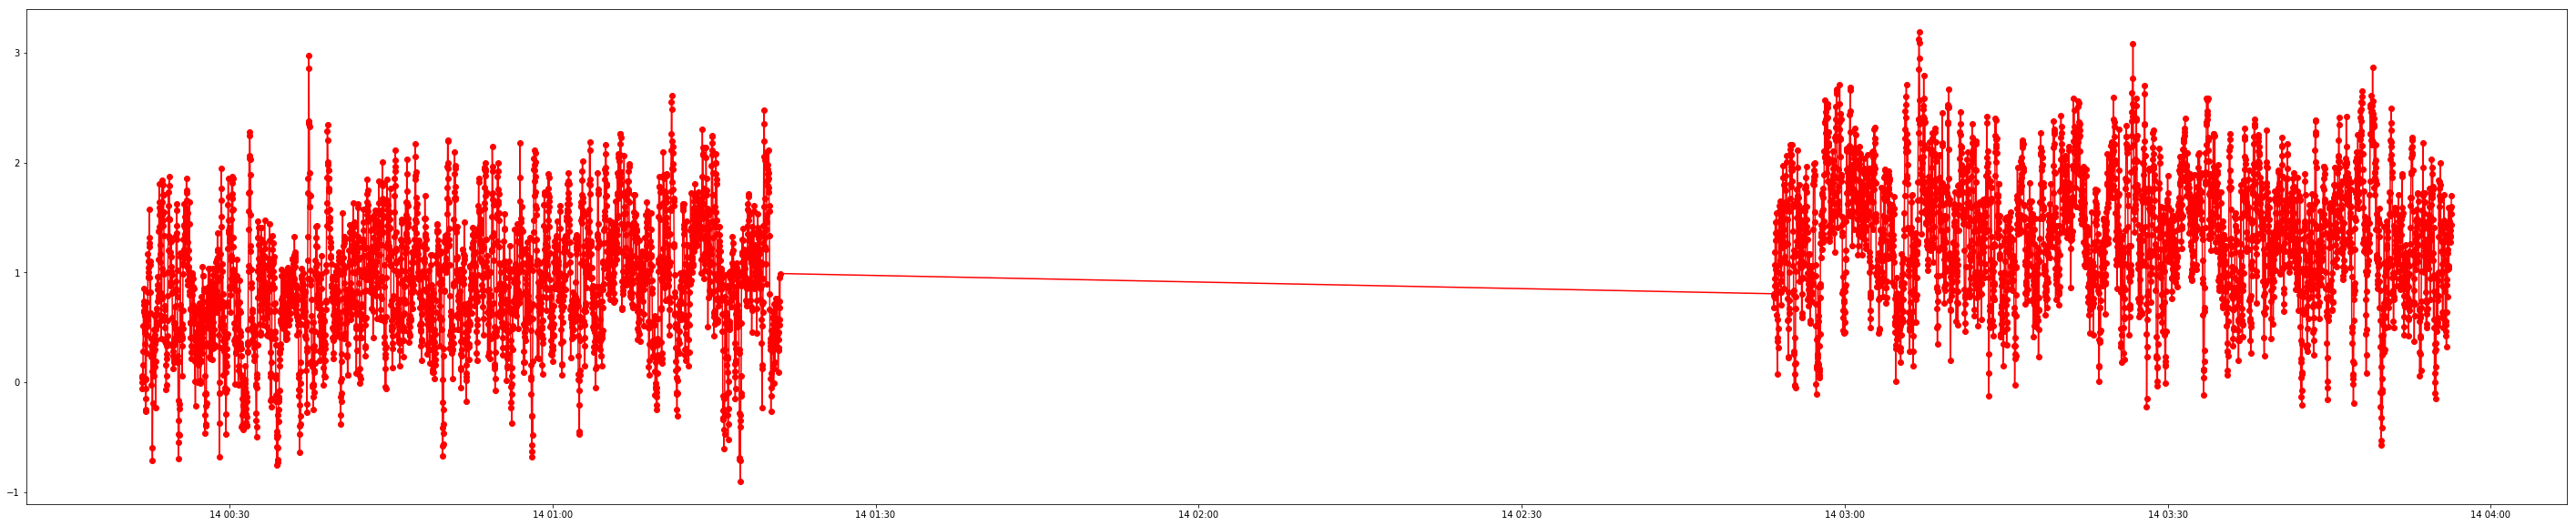

In [60]:
plt.figure(figsize=(50,10))
plt.plot_date(x=df2.datetime, y=df2.vader_sentiment,fmt="ro-",label="ROC_7")
plt.show();

In [62]:
print(df2.vader_sentiment.mean())
print('********************')
print(amazondf2.vader_sentiment.mean())
print(googledf2.vader_sentiment.mean())
print(appledf2.vader_sentiment.mean())
print(disneydf2.vader_sentiment.mean())
print(forddf2.vader_sentiment.mean())

0.10207533368994745
********************
0.2910790943906227
0.18485664684986297
0.12435313941906045
-0.03515747619616427
0.04858443847319813


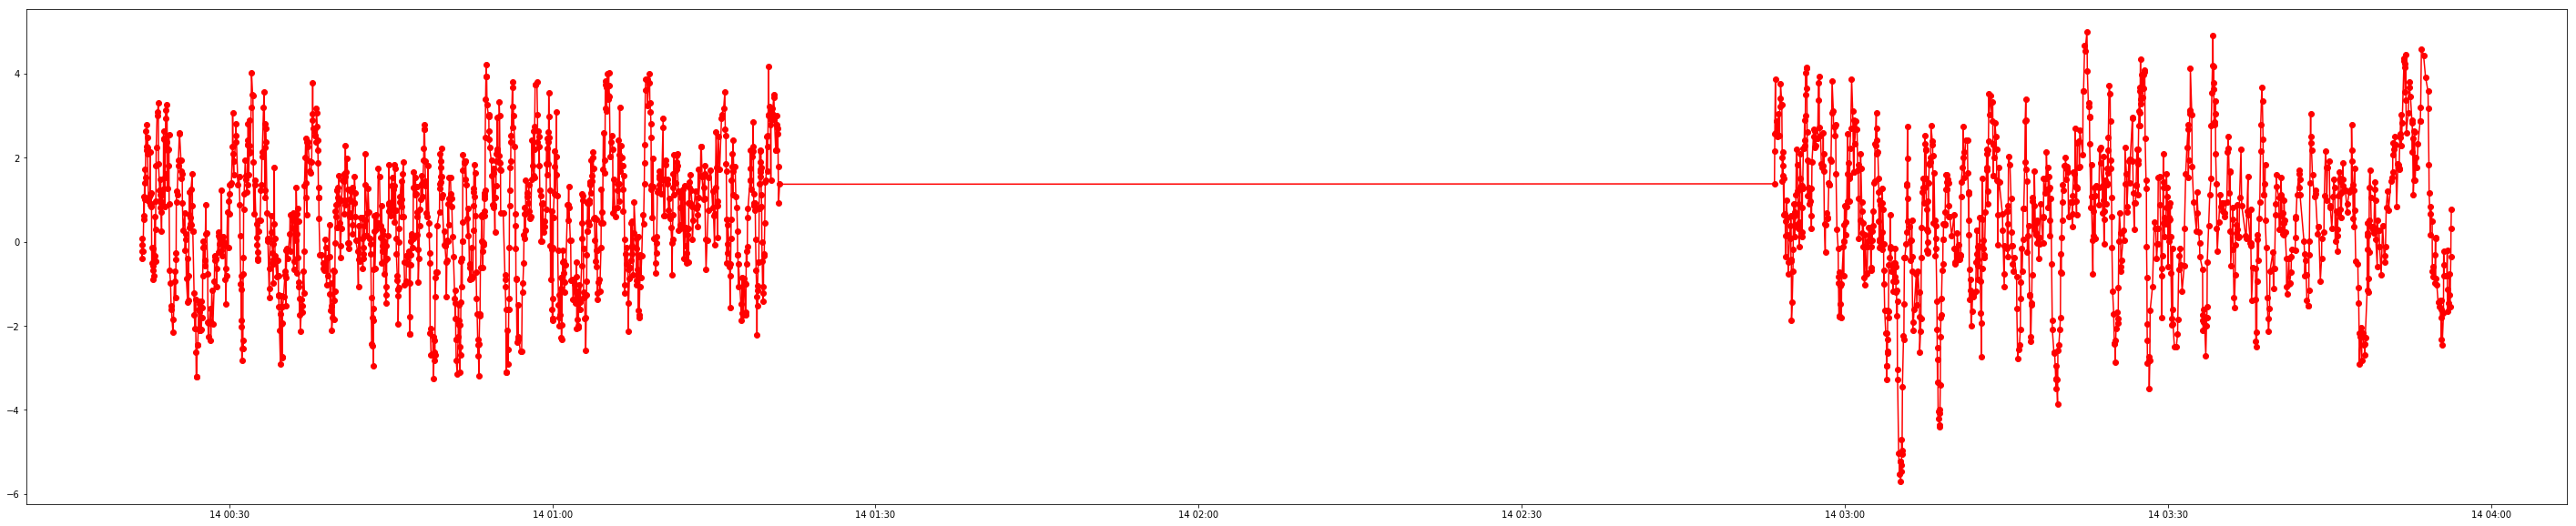

In [61]:
plt.figure(figsize=(50,10))
plt.plot_date(x=forddf2.datetime, y=forddf2.shift_sent,fmt="ro-",label="ROC_7")
plt.show();

In [63]:
date = ['May 13 15:59:00 2019','May 14 09:30:00 2019']
aaplstock = {'date':date, 'price':[185.72,185.92]}
aaplstock = pd.DataFrame(aaplstock)
aaplstock['datetime'] =  pd.to_datetime(aaplstock['date'])
aaplstock

,date,price,datetime
0,May 13 15:59:00 2019,185.72,2019-05-13 15:59:00
1,May 14 09:30:00 2019,185.92,2019-05-14 09:30:00


In [64]:
googstock = {'date':date, 'price':[1132.20,1139.61]}
googstock = pd.DataFrame(googstock)
googstock['datetime'] =  pd.to_datetime(googstock['date'])
googstock

,date,price,datetime
0,May 13 15:59:00 2019,1132.20,2019-05-13 15:59:00
1,May 14 09:30:00 2019,1139.61,2019-05-14 09:30:00


In [65]:
disnstock = {'date':date, 'price':[131.33,133.30]}
disnstock = pd.DataFrame(disnstock)
disnstock['datetime'] =  pd.to_datetime(disnstock['date'])
disnstock

,date,price,datetime
0,May 13 15:59:00 2019,131.33,2019-05-13 15:59:00
1,May 14 09:30:00 2019,133.30,2019-05-14 09:30:00


In [66]:
fordstock = {'date':date, 'price':[10.08,10.19]}
fordstock = pd.DataFrame(fordstock)
fordstock['datetime'] =  pd.to_datetime(fordstock['date'])
fordstock

,date,price,datetime
0,May 13 15:59:00 2019,10.08,2019-05-13 15:59:00
1,May 14 09:30:00 2019,10.19,2019-05-14 09:30:00


In [67]:
amznstock = {'date':date, 'price':[1822.62,1834.40]}
amznstock = pd.DataFrame(amznstock)
amznstock['datetime'] =  pd.to_datetime(amznstock['date'])
amznstock

,date,price,datetime
0,May 13 15:59:00 2019,1822.62,2019-05-13 15:59:00
1,May 14 09:30:00 2019,1834.40,2019-05-14 09:30:00


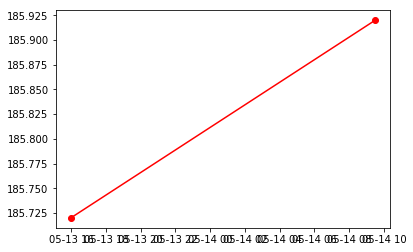

0.12435313941906045


0.10768899418478473

In [68]:
# plt.plot_date(x=disnstock.datetime, y=disnstock.price,fmt="ro-",label="ROC_7")
# plt.plot_date(x=fordstock.datetime, y=fordstock.price,fmt="ro-",label="ROC_7")

plt.plot_date(x=aaplstock.datetime, y=aaplstock.price,fmt="ro-",label="ROC_7")
# plt.plot_date(x=googstock.datetime, y=googstock.price,fmt="ro-",label="ROC_7")
# plt.plot_date(x=amznstock.datetime, y=amznstock.price,fmt="ro-",label="ROC_7")
plt.show();
print(appledf2.vader_sentiment.mean())
((aaplstock.price.max() / aaplstock.price.min()) - 1)*100

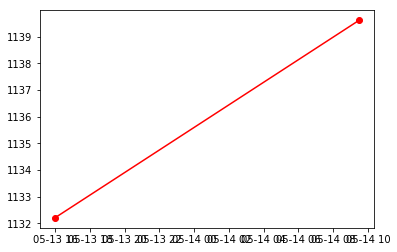

0.18485664684986297


0.6544780074191792

In [69]:
plt.plot_date(x=googstock.datetime, y=googstock.price,fmt="ro-",label="ROC_7")
plt.show();
print(googledf2.vader_sentiment.mean())
((googstock.price.max() / googstock.price.min()) - 1)*100

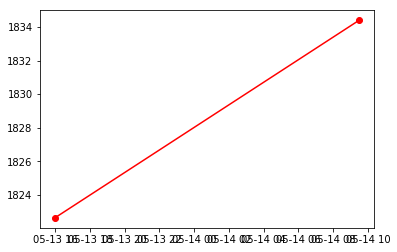

0.2910790943906227


0.6463223271993224

In [70]:
plt.plot_date(x=amznstock.datetime, y=amznstock.price,fmt="ro-",label="ROC_7")
plt.show();
print(amazondf2.vader_sentiment.mean())
((amznstock.price.max() / amznstock.price.min()) - 1)*100